# Automated CAPTCHA Solving With Deep Learning

This notebook demonstrates the use of convolutional neural networks and supervised training to automate CAPTCHA-solving. 

Original Author: Jackon Yang (2017)

Further Modified By: Turhan Kimbrough (2021)

---

In [1]:
import os

# Functions from other notebook file.
from ipynb.fs.full.shared_functions import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/multi-fonts')

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 3

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 4  # 4-digit CAPTCHA images

TRAINING_EPOCHS = 10

TRAINING_BATCH_SIZE = 32
VALIDATION_BATCH_SIZE = 32
TESTING_BATCH_SIZE = 128

---
## Prepare the Dataset



Store each CAPTCHA-image file path with its respective label
into a pandas DataFrame.

In [5]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,7719,/mnt/wd-blue/captcha-tensorflow/datasets/multi...
1,7116,/mnt/wd-blue/captcha-tensorflow/datasets/multi...
2,6604,/mnt/wd-blue/captcha-tensorflow/datasets/multi...
3,2500,/mnt/wd-blue/captcha-tensorflow/datasets/multi...
4,8836,/mnt/wd-blue/captcha-tensorflow/datasets/multi...


---
Shuffle the data and create a training set, validation set, and testing set.

In [6]:
train_indices, validation_indices, test_indices = shuffle_and_split_data(data_frame)

print('train count: %s, validation count: %s, test count: %s' % (
    len(train_indices), len(validation_indices), len(test_indices)))

train count: 4900, validation count: 2100, test count: 3000


---
## Get a baseline sequential model

In [7]:
model = create_untrained_vgg16_model(IMAGE_HEIGHT,
                                     IMAGE_WIDTH,
                                     IMAGE_CHANNELS,
                                     DIMENSIONS,
                                     CATEGORIES)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 25, 25, 256)       2

---
## Train the Model

In [8]:
history = train_model(model, 
                      data_frame, 
                      train_indices, 
                      validation_indices, 
                      TRAINING_BATCH_SIZE, 
                      VALIDATION_BATCH_SIZE, 
                      TRAINING_EPOCHS)

Epoch 1/10
153/153 [==============================] - 56s 278ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.0948
Epoch 2/10
153/153 [==============================] - 43s 278ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0942
Epoch 3/10
153/153 [==============================] - 43s 278ms/step - loss: 2.3026 - accuracy: 0.1019 - val_loss: 2.3027 - val_accuracy: 0.0972
Epoch 4/10
153/153 [==============================] - 42s 278ms/step - loss: 2.3025 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0970
Epoch 5/10
153/153 [==============================] - 42s 278ms/step - loss: 2.3025 - accuracy: 0.1026 - val_loss: 2.3028 - val_accuracy: 0.0974
Epoch 6/10
153/153 [==============================] - 43s 279ms/step - loss: 2.3025 - accuracy: 0.1033 - val_loss: 2.3028 - val_accuracy: 0.0975
Epoch 7/10
153/153 [==============================] - 43s 279ms/step - loss: 2.3025 - accuracy: 0.1033 - val_loss: 2.3028 - val_ac

---
## Analyze Model Performance

Plot the accuracy and loss metrics

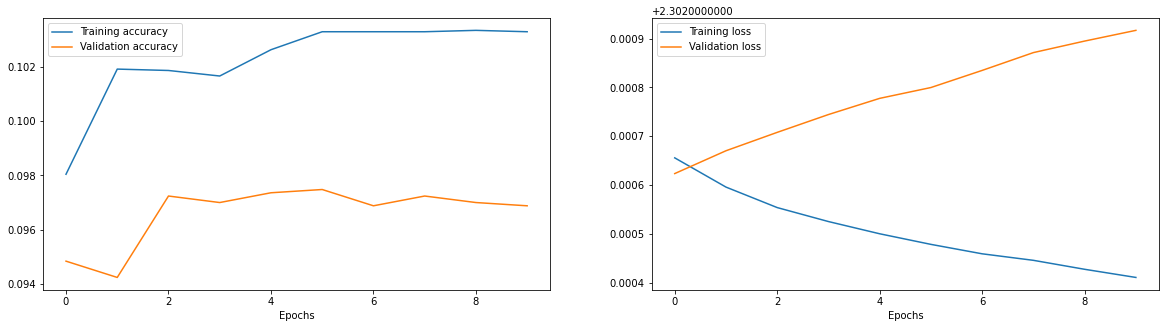

In [9]:
plot_training_history(history)

Use some 'unseen' test samples

In [10]:
for_training=False

testing_set_generator = get_captcha_generator(data_frame, 
                                              test_indices, 
                                              for_training, 
                                              TESTING_BATCH_SIZE,
                                              IMAGE_HEIGHT,
                                              IMAGE_WIDTH,
                                              CATEGORIES)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, 
                                             steps=len(test_indices)//TESTING_BATCH_SIZE)))

23/23 [==============================] - 19s 297ms/step - loss: 2.3029 - accuracy: 0.0961


{'loss': 2.3029446601867676, 'accuracy': 0.0961277186870575}

---
## Visualize Model Performance

In [11]:
captcha_images, predictions, true_values = get_prediction_results(model, 
                                                                  data_frame, 
                                                                  test_indices, 
                                                                  TESTING_BATCH_SIZE)

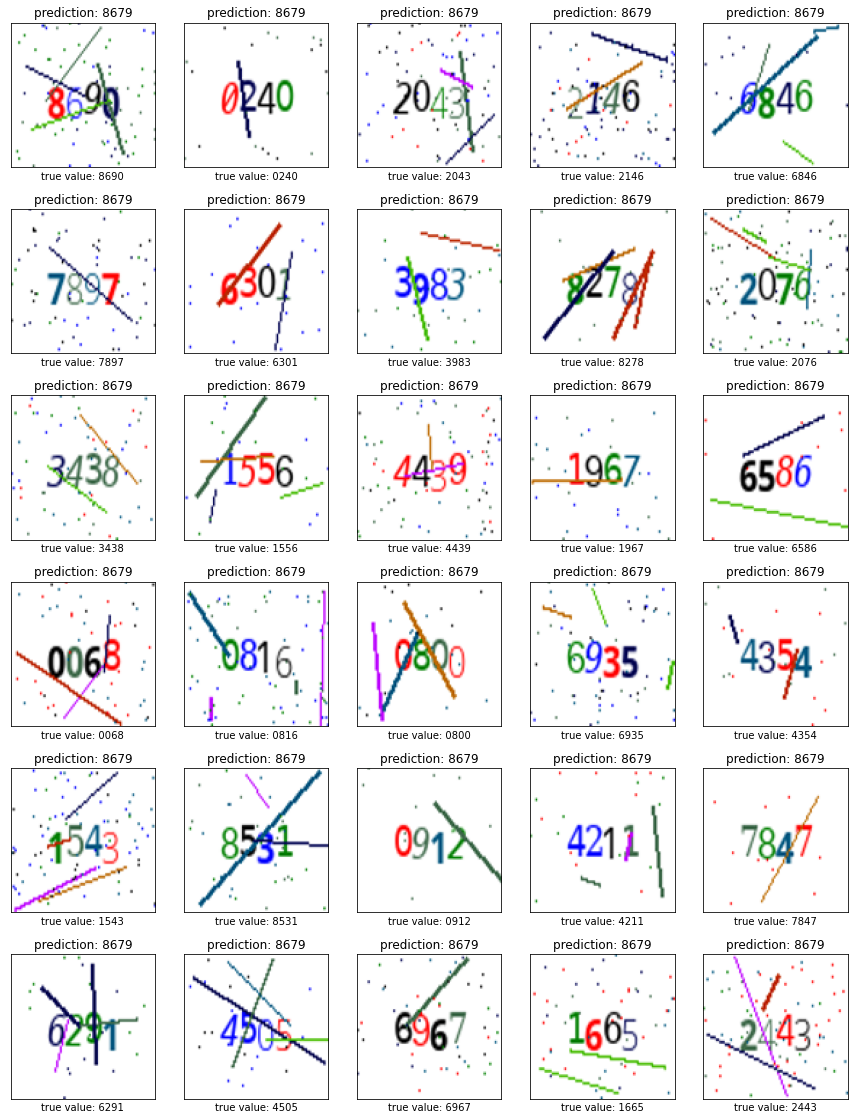

In [12]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)

## Save the Model

In [13]:
#model.save('my_model')